### Edgar Moises Hernandez-Gonzalez
#### 10/06/20-24/06/20
#### Imagen de CWT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

In [2]:
# canal C4 es el 19
# 18*1344 = 24192, 19*1344 = 25536
# 18*1024 = 18432, 19*1024 = 19456
# 18*1344+160 = 24352, 19*1344-160 = 25376
canalC4 = pd.read_csv("MeCa_car_10_1.csv", header=None).iloc[0, 24192:25536]
# canalC4 = pd.read_csv("VentaneoMC-01-1.csv", header=None).iloc[1, 18432:19456]

In [3]:
canalC4.shape

(1344,)

(1344,)


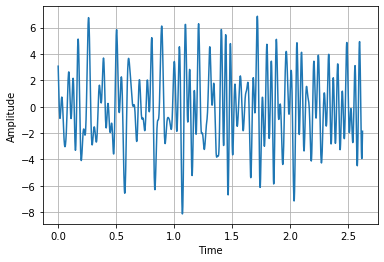

In [4]:
fs = 512
time = np.arange(0, 2.625, 1/fs)
# time = np.arange(0, 2, 1/fs)
sig = canalC4
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
escalas = pywt.scale2frequency('cmor3-3', np.arange(8,30.5,0.5)) / (1/fs)

In [6]:
escalas

array([192.        , 180.70588235, 170.66666667, 161.68421053,
       153.6       , 146.28571429, 139.63636364, 133.56521739,
       128.        , 122.88      , 118.15384615, 113.77777778,
       109.71428571, 105.93103448, 102.4       ,  99.09677419,
        96.        ,  93.09090909,  90.35294118,  87.77142857,
        85.33333333,  83.02702703,  80.84210526,  78.76923077,
        76.8       ,  74.92682927,  73.14285714,  71.44186047,
        69.81818182,  68.26666667,  66.7826087 ,  65.36170213,
        64.        ,  62.69387755,  61.44      ,  60.23529412,
        59.07692308,  57.96226415,  56.88888889,  55.85454545,
        54.85714286,  53.89473684,  52.96551724,  52.06779661,
        51.2       ])

In [7]:
coef, freqs = pywt.cwt(sig, escalas, 'cmor3-3', sampling_period = (1 / 512))

In [8]:
x = abs(coef)

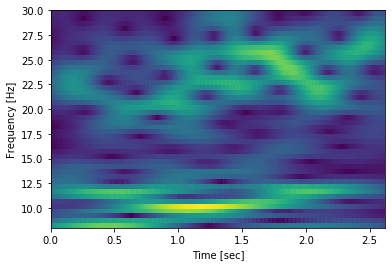

In [9]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(45, 1344)


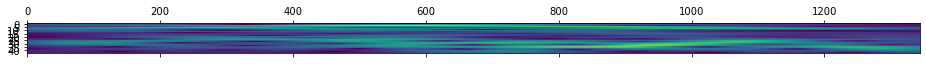

In [10]:
print(x.shape)
plt.matshow(x)
plt.show()

(45, 1344)


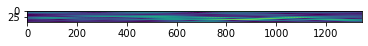

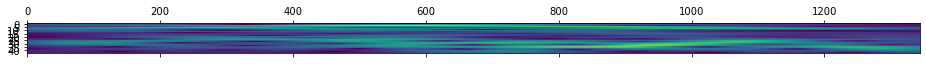

In [11]:
# en el resize los dos se dividen entre 4
dim = (1344, 45) #ancho, alto

resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()